# Feature Enhancing

This rather simple notebook is a small illustration how feature enhancing might work in specific cases, we have a dataset containing cars and their fuel efficiency. What we will try to illustrate here is that sometimes combinations or formulas using the original data might display patterns not visible with the previous data.

In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import spearmanr

we load the mpg dataset and have a look at it.

In [2]:
mpg = sns.load_dataset('mpg')

In [3]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


We'll try to explore our dataset by printing out some regression plots between features of the car and the mileage per gallon.

acceleration correlation: 43.87%


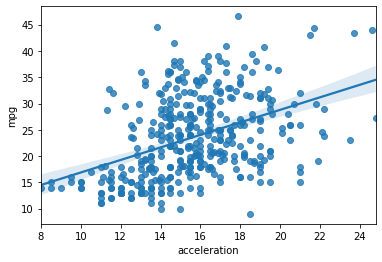

In [4]:
sns.regplot(x=mpg['acceleration'], y=mpg['mpg'])
corr, p = spearmanr(mpg['mpg'], mpg['acceleration'])
print('acceleration correlation: ' + str(100*round(corr,4)) + "%")

weight correlation: -87.49%


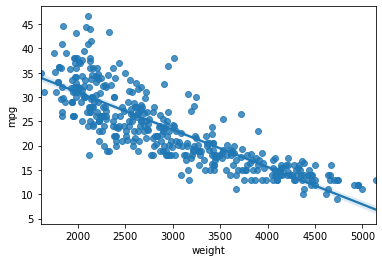

In [5]:
sns.regplot(x=mpg['weight'], y=mpg['mpg'])
corr, p = spearmanr(mpg['mpg'], mpg['weight'])
print('weight correlation: ' + str(100*round(corr,4)) + "%")

We can see that the acceleration has a positive influence on the miles per gallon, whilst the weight has a negative influence, what about the acceleration per weight?

In [6]:
mpg['new_feature'] = mpg['acceleration']/mpg['weight']

In [7]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,new_feature
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,0.003425
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,0.003114
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,0.003201
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,0.003495
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,0.003044


new feature correlation: 84.19%


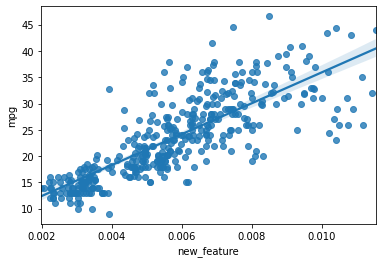

In [8]:
sns.regplot(x=mpg['new_feature'], y=mpg['mpg'])
corr, p = spearmanr(mpg['mpg'], mpg['new_feature'])
print('new feature correlation: ' + str(100*round(corr,4)) + "%")

It seems we are not able to create a new feature with even more correlation, not every story has to be a success. We can report this to our boss and explain the results.